In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/adsm1rnov/GP-2/refs/heads/develop/hotellook.csv')
df.head(3)

<ipython-input-18-030b74d4f482>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/adsm1rnov/GP-2/refs/heads/develop/hotellook.csv')


,id,name,address,location_id,latitude,longitude,stars,rating,reviews_count,min_price,...,popularity,popularity2,trending_speed,photos_ids,pois_distances,nearest_poi_by_category,districts_ids,weights,scoring,debug_info
0,1250022545,Мини-Отель Мопс на Рубинштейна,"улица Рубинштейна, д.12, Санкт-Петербург",12196,59.931152,30.345670,3,9.2,498,19,...,69104,291,1.6,"['7515131692', '8286984314', '7515134055', '75...","{'71006': 14062, '71781': 732, '71817': 433, '...","{'airport': 71006, 'beach': 346587, 'metro_sta...",[1664298],{'default': 2.2985132},{},NaN
1,964250854,Мини Отель Mushroom,"Набережная Канала Грибоедова,42",12196,59.930200,30.319010,3,9.3,0,17,...,69103,232,0.0,"['7510410856', '9611111725', '9400656506', '94...","{'71006': 13814, '71842': 422, '71862': 405, '...","{'airport': 71006, 'beach': 346587, 'metro_sta...",[1416598],{'default': 2.0068567},{},NaN
2,333570,Отель Вега Измайлово,Измайловское шоссе 71 строение 3В,12153,55.790752,37.747135,4,9.0,15712,46,...,69102,2268,0.0,"['7489913361', '8352837505', '8352837517', '74...","{'69873': 35331, '69874': 42911, '69885': 2839...","{'airport': 69885, 'metro_station': 72010, 'tr...",[1416636],{'default': 2.2766292},{},NaN


In [19]:
df.isnull().sum()

,0
id,0
name,4001
address,94
location_id,0
latitude,0
longitude,0
stars,0
rating,0
reviews_count,0
min_price,0


In [20]:
df.duplicated().sum()

0

Видно, что debug_info, check_in, check_out, chain в них пропусков >50%, поэтому имеет смысл их дропнуть, либо заполнить как то исследованием

In [21]:
print(df['check_in'].unique())
print(df['check_out'].unique())
print(df['year_opened'].unique())
print(df['year_renovated'].unique())
print(df['debug_info'].unique())

[nan]
[nan]
[0]
[0]
[nan]


Заметим, что year_opened, year_renovated у нас столбцы нулей - тоже дроп

In [22]:
df.columns

Index(['id', 'name', 'address', 'location_id', 'latitude', 'longitude',
       'stars', 'rating', 'reviews_count', 'min_price', 'median_min_price',
       'distance_to_center', 'chain', 'property_type', 'photos_count',
       'amenities', 'badges', 'check_in', 'check_out', 'year_opened',
       'year_renovated', 'popularity', 'popularity2', 'trending_speed',
       'photos_ids', 'pois_distances', 'nearest_poi_by_category',
       'districts_ids', 'weights', 'scoring', 'debug_info'],
      dtype='object')

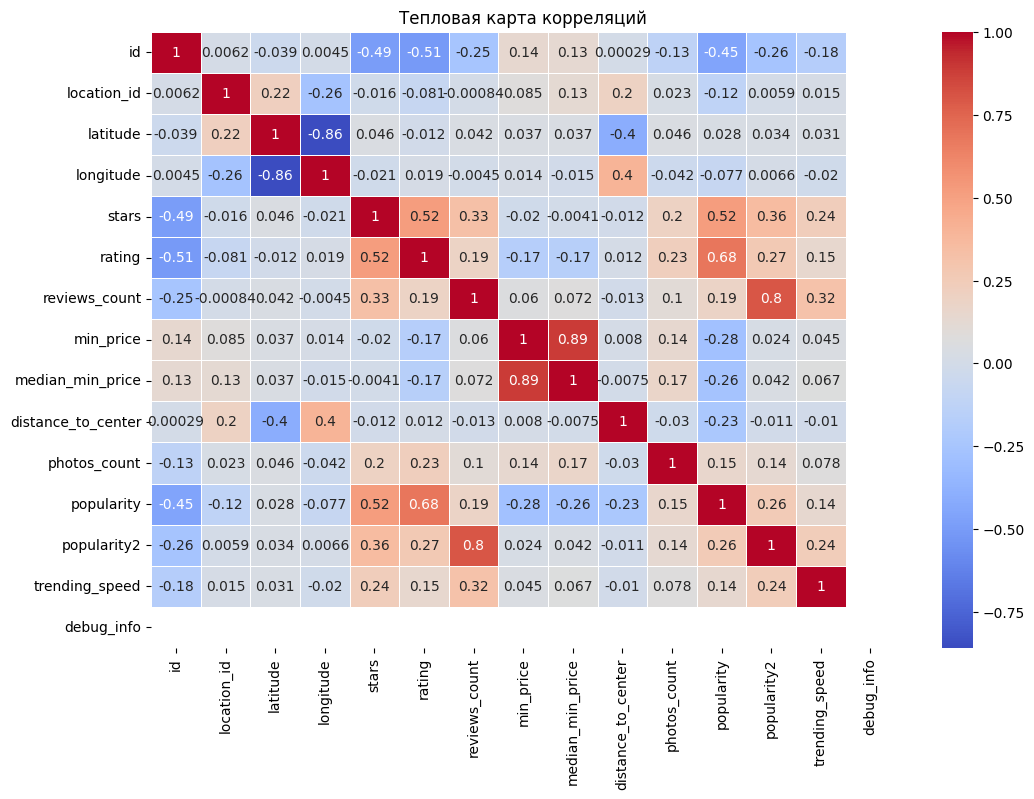

In [23]:
df1 = df.copy()
df1.drop(columns=['check_in', 'check_out', 'year_opened','year_renovated'], inplace=True)

plt.figure(figsize=(12, 8))
correlation_matrix = df1.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

In [24]:
df['scoring'].unique()

array(['{}'], dtype=object)

Нам ничего полезного не дают айдишники фоток, помимо этого scoring - столбец пустых словарей, median_min_price сильно коррелирует с min_price, что не есть хорошо, да и пока не совсем ясно как она считалась, дропнем пока что, там посмотрим

In [25]:
df.drop(columns=['check_in', 'check_out','year_opened','year_renovated','photos_ids','chain', 'scoring', 'median_min_price', 'debug_info'],inplace=True)
df.columns

Index(['id', 'name', 'address', 'location_id', 'latitude', 'longitude',
       'stars', 'rating', 'reviews_count', 'min_price', 'distance_to_center',
       'property_type', 'photos_count', 'amenities', 'badges', 'popularity',
       'popularity2', 'trending_speed', 'pois_distances',
       'nearest_poi_by_category', 'districts_ids', 'weights'],
      dtype='object')

In [26]:
df.isnull().sum()

,0
id,0
name,4001
address,94
location_id,0
latitude,0
longitude,0
stars,0
rating,0
reviews_count,0
min_price,0


In [27]:
df['location_id'].unique()

array([12196, 12153, 12099, 12193])

В location_id всего 4 уникальных значения - проведено исследование по широте и долготе - это города, перезапишем эти цифры на названия городов, нам так понятнее будет

In [28]:
location_mapping = {
    12099: "Геленджик, Россия",
    12153: "Москва, Россия",
    12193: "Сочи, Россия",
    12196: "Санкт-Петербург, Россия"}

df["location_id"] = df["location_id"].map(location_mapping)

Аналогичная история с districts_ids - непонятно что это за округа, проведено доп исследования, перезапишем на человеческий

In [29]:
expanded_district_boundaries_v2 = {
    "Москва - Центральный округ": {"lat_min": 55.70, "lat_max": 55.80, "lon_min": 37.50, "lon_max": 37.80},
    "Москва - Северный округ": {"lat_min": 55.80, "lat_max": 56.00, "lon_min": 37.30, "lon_max": 37.70},
    "Москва - Южный округ": {"lat_min": 55.50, "lat_max": 55.70, "lon_min": 37.40, "lon_max": 37.80},
    "Санкт-Петербург - Центральный район": {"lat_min": 59.90, "lat_max": 60.00, "lon_min": 30.20, "lon_max": 30.45},
    "Санкт-Петербург - Василеостровский район": {"lat_min": 59.90, "lat_max": 60.00, "lon_min": 30.15, "lon_max": 30.30},
    "Санкт-Петербург - Московский район": {"lat_min": 59.80, "lat_max": 59.90, "lon_min": 30.20, "lon_max": 30.45},
    "Сочи - Центральный район": {"lat_min": 43.50, "lat_max": 43.65, "lon_min": 39.60, "lon_max": 39.85},
    "Сочи - Адлерский район": {"lat_min": 43.35, "lat_max": 43.50, "lon_min": 39.80, "lon_max": 40.10},
    "Сочи - Лазаревский район": {"lat_min": 43.80, "lat_max": 44.20, "lon_min": 39.20, "lon_max": 39.80},
    "Геленджик - Центральный район": {"lat_min": 44.50, "lat_max": 44.70, "lon_min": 37.80, "lon_max": 38.50},
    "Краснодар - Центральный округ": {"lat_min": 44.95, "lat_max": 45.15, "lon_min": 38.85, "lon_max": 39.20},}

def find_expanded_district_v2(lat, lon):
    for district, bounds in expanded_district_boundaries_v2.items():
        if bounds["lat_min"] <= lat <= bounds["lat_max"] and bounds["lon_min"] <= lon <= bounds["lon_max"]:
            return district
    return "Неизвестный район"

df["district_name"] = df.apply(lambda row: find_expanded_district_v2(row["latitude"], row["longitude"]), axis=1)

In [30]:
df.drop(columns='districts_ids', inplace=True)

Заметим, что в столбце amenities у нас списки перечесления услуг под опредленными цифрами - перекодируем на названия услуг

In [31]:
hotels_amenities = {
    "0": "Ресторан/кафе",
    "1": "Парковка",
    "3": "Можно с животными",
    "4": "Телевизор",
    "5": "Прачечная",
    "6": "Кондиционер",
    "8": "Бассейн",
    "9": "Спортзал",
    "10": "Wi-Fi в лобби",
    "11": "Wi-fi в комнатах",
    "12": "Фен",
    "13": "Общая ванна",
    "14": "Сейф",
    "15": "Няня",
    "16": "Развлечения для детей",
    "17": "Помощь малоподвижным людям",
    "18": "Ресепшн 24 часа",
    "19": "Частный пляж",
    "20": "Спа",
    "21": "Курящие номера",
    "22": "Общие номера"}


def replace_amenities(amenities_str):
    try:
        amenities_list = ast.literal_eval(amenities_str) if isinstance(amenities_str, str) else []
        return [hotels_amenities.get(str(a), f"Неизвестно ({a})") for a in amenities_list]
    except Exception as e:
        return None

df["amenities"] = df["amenities"].apply(replace_amenities)

Столбец badges также состоит из списков строк с различными тегами для отелей, вытащим их из списков - ну так красивее и удобнее

In [32]:
def extract_words(value):
    try:
        data = ast.literal_eval(value)
        if isinstance(data, dict):
            words = [str(v) for v in data.values() if isinstance(v, str)]
        elif isinstance(data, list):
            words = [str(item) for item in data if isinstance(item, str)]
        else:
            return ""
        return ", ".join(words)
    except (ValueError, SyntaxError):
        return ""

if "badges" in df.columns:
    df["badges"] = df["badges"].astype(str).apply(extract_words)

Есть еще 2 интересных столбца pois_distances и nearest_poi_by_category. В первом указаны различные локации под номерами и расстояния до них, во втором указаны самые ближайшие аэоропорт, станция метро, вокзал и пляж их первого столбца и указано под какими цифрами забита каждая локация - сделаем следующее: перекодируем цифры в слова и создадим 4 столбца с локациями, в которых будут указаны ближайшие, а именно расстояние для ближайших - это можем создать дополнительные новые зависимости, которые вляют на таргет

In [33]:
def extract_final_corrected_distances(row):
    try:
        pois = ast.literal_eval(row["pois_distances"]) if isinstance(row["pois_distances"], str) else {}
        nearest_pois = ast.literal_eval(row["nearest_poi_by_category"]) if isinstance(row["nearest_poi_by_category"], str) else {}
        distances = {
            "airport": pois.get(str(nearest_pois.get("airport")), None),
            "metro_station": pois.get(str(nearest_pois.get("metro_station")), None),
            "train_station": pois.get(str(nearest_pois.get("train_station")), None),
            "beach": pois.get(str(nearest_pois.get("beach")), None)}
        return pd.Series(distances)
    except Exception as e:
        return pd.Series({"airport": None, "metro_station": None, "train_station": None, "beach": None})

df[["nearest_airport", "nearest_metro_station", "nearest_train_station", "nearest_beach"]] = df.apply(extract_final_corrected_distances, axis=1)

In [34]:
df.drop(columns=['pois_distances','nearest_poi_by_category'], inplace=True)

Столбец weights также выглядит странно - опять словари со словом дефолт, вытащим только значения

In [35]:
df["weights"] = df["weights"].apply(lambda x: ast.literal_eval(x).get("default") if isinstance(x, str) and x.startswith("{") else x)

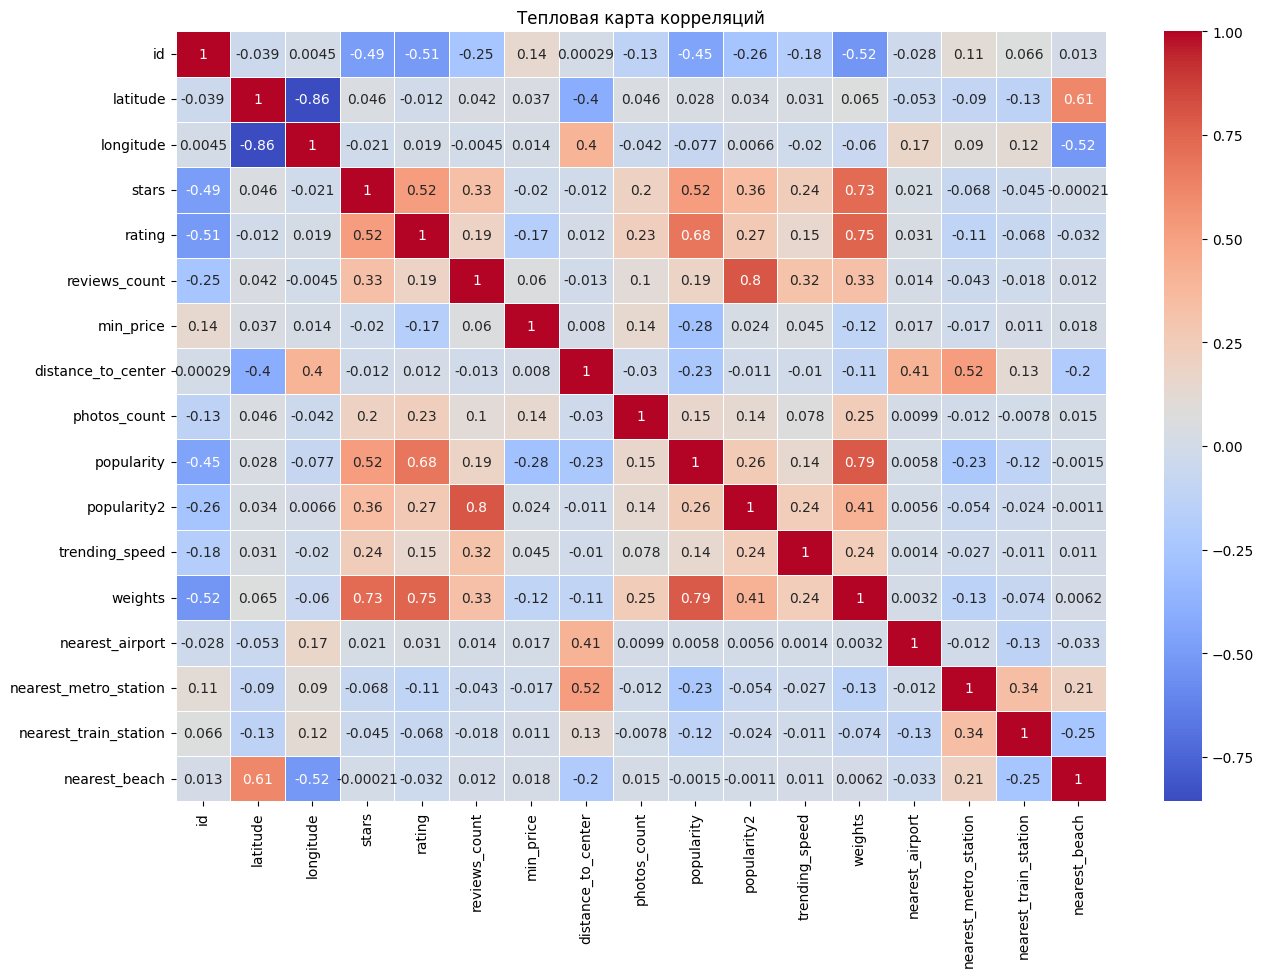

In [36]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

In [37]:
df.to_csv("cleaned_hotellook.csv", index=False, encoding='utf-8')